In [123]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [124]:
df = pd.read_csv("Excels\\covid_19_data.csv")
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [125]:
# Step 1: Data Understanding
# Dataframe shape
# head and tail
# dtypes
# describe
# identify NA values

In [126]:
df.shape

(306429, 8)

In [127]:
df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [128]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


In [129]:
df.isna().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [130]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [131]:
# Step 2: Data Preperation
# Dropping irrelevant columns and rows
# Identifying duplicated columns
# Renaming Columns
# Feature Creation
# converting time to date_time
# set_index
# identifying Duplicates

In [132]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [133]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [134]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [135]:
df = df.rename(columns= {
    'SNo' : 'SNO',
    'ObservationDate' : "Observation_Date",
    'Last Update' : "Last_Update"
})

In [136]:
df = df[['Observation_Date', 'Province/State', 'Country/Region',
       'Last_Update', 'Confirmed', 'Deaths', 'Recovered'
]] # removed SNO

In [137]:
df.head()

,Observation_Date,Province/State,Country/Region,Last_Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [151]:
df.loc[df.duplicated()] # This locate rows where ALLL columns are duplicated

,Observation_Date,Province/State,Country/Region,Last_Update,Confirmed,Deaths,Recovered


In [139]:
df.fillna("Unknown",inplace=True)

In [140]:
df['Province/State'].value_counts()

Province/State
Unknown                         82226
Amazonas                         1109
Diamond Princess cruise ship      924
Grand Princess                    882
Punjab                            708
                                ...  
Harrison County, KY                 1
Queens County, NY                   1
Johnson County, IA                  1
Unassigned Location, VT             1
Charlotte County, FL                1
Name: count, Length: 736, dtype: int64

In [141]:
df.loc[df.duplicated(subset=['Province/State','Country/Region'])] # lists all duplicates

,Observation_Date,Province/State,Country/Region,Last_Update,Confirmed,Deaths,Recovered
40,2020-01-23,Anhui,Mainland China,1/23/20 17:00,9.0,0.0,0.0
41,2020-01-23,Beijing,Mainland China,1/23/20 17:00,22.0,0.0,0.0
42,2020-01-23,Chongqing,Mainland China,1/23/20 17:00,9.0,0.0,0.0
43,2020-01-23,Fujian,Mainland China,1/23/20 17:00,5.0,0.0,0.0
44,2020-01-23,Gansu,Mainland China,1/23/20 17:00,2.0,0.0,0.0
...,...,...,...,...,...,...,...
306424,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [142]:
df[df['Province/State'] == 'Zaporizhia Oblast'] # an exmaple of a duplicate

,Observation_Date,Province/State,Country/Region,Last_Update,Confirmed,Deaths,Recovered
33624,2020-06-01,Zaporizhia Oblast,Ukraine,2021-04-02 15:13:53,447.0,13.0,252.0
34291,2020-06-02,Zaporizhia Oblast,Ukraine,2021-04-02 15:13:53,450.0,13.0,253.0
34959,2020-06-03,Zaporizhia Oblast,Ukraine,2021-04-02 15:13:53,463.0,13.0,258.0
35627,2020-06-04,Zaporizhia Oblast,Ukraine,2021-04-02 15:13:53,469.0,14.0,269.0
36315,2020-06-05,Zaporizhia Oblast,Ukraine,2021-04-02 15:13:53,477.0,14.0,280.0
...,...,...,...,...,...,...,...
303364,2021-05-25,Zaporizhia Oblast,Ukraine,2021-05-26 04:20:35,101870.0,2270.0,93311.0
304129,2021-05-26,Zaporizhia Oblast,Ukraine,2021-05-27 04:20:59,102089.0,2293.0,93691.0
304894,2021-05-27,Zaporizhia Oblast,Ukraine,2021-05-28 04:20:36,102276.0,2313.0,94167.0
305659,2021-05-28,Zaporizhia Oblast,Ukraine,2021-05-29 04:20:41,102471.0,2323.0,94730.0


In [156]:
df = df[~df.duplicated(subset=['Province/State','Country/Region'])].reset_index(drop=True).copy()
df # from 30k rows to 969

,Observation_Date,Province/State,Country/Region,Last_Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
964,2020-11-12,Walloon Brabant,Belgium,2021-04-02 15:13:53,21252.0,0.0,0.0
965,2020-11-12,West Flanders,Belgium,2021-04-02 15:13:53,38722.0,0.0,0.0
966,2020-11-24,Repatriated Travellers,Canada,2021-04-02 15:13:53,13.0,0.0,13.0
967,2021-01-03,Wallis and Futuna,France,2021-04-02 15:13:53,4.0,0.0,1.0


,Observation_Date,Province/State,Country/Region,Last_Update,Confirmed,Deaths,Recovered
867,2020-06-01,Zaporizhia Oblast,Ukraine,2021-04-02 15:13:53,447.0,13.0,252.0


In [144]:
# Step 3: Feature Understanding
# Plotting Feature Distributions
# Histogram
# KDE
# Boxplot
# Identifying Outlier

In [145]:
df.columns

Index(['Observation_Date', 'Province/State', 'Country/Region', 'Last_Update',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

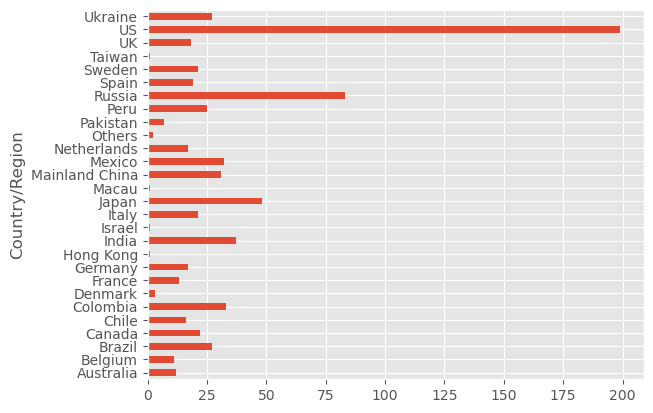

In [146]:
df[df['Province/State'] != 'Unknown'].groupby("Country/Region")['Confirmed'].count().plot(kind='barh')

plt.show()